In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [31]:
types= {
    "event": "category", 
    "model": "category", 
    "condition": "category", 
    "color": "category", 
    "storage": "category"
}
df_events = pd.read_csv("events.csv", dtype=types, low_memory=False)

In [32]:
models = df_events[["person","model","storage","event","color","condition"]]
models = models.loc[models["event"] == "conversion" ,:]

In [33]:
df = df_events.loc[(df_events["country"].isnull() == False) & (df_events["country"] != "Unknown"),:]
df = df[['person','country','region']]

df = df.drop_duplicates(subset='person')


#df2 = df[["person","region","country"]]

models = models.merge(df, on='person')

In [47]:
brazil = models.loc[models["country"] == "Brazil"]
brazil = brazil.loc[brazil["region"] != "Unknown"]

#top = brazil["region"].value_counts()

top_10_t = brazil["model"].value_counts().head(10)
top_10 = top_10_t.index.tolist()
top_10.sort()
top_10

['Motorola Moto G3 4G',
 'Motorola Moto G4 Plus',
 'Samsung Galaxy Gran Prime Duos TV',
 'Samsung Galaxy J5',
 'Samsung Galaxy J7',
 'Samsung Galaxy S6 Flat',
 'iPhone 5c',
 'iPhone 5s',
 'iPhone 6',
 'iPhone 6S']

In [71]:

sao_pablo = brazil.loc[(brazil["region"] == "Sao Paulo")&(brazil["model"].isin(top_10))]
sao_pablo = sao_pablo["model"].value_counts().head(10).sort_index()

modelos_f = pd.Series( [0,0,0,0,0,0,0,0,0,0],
    index = ['Motorola Moto G3 4G', 'Motorola Moto G4 Plus','Samsung Galaxy Gran Prime Duos TV', 'Samsung Galaxy J5','Samsung Galaxy J7','Samsung Galaxy S6 Flat',
 'iPhone 5c','iPhone 5s','iPhone 6','iPhone 6S'])



In [72]:
minas_gerais = brazil.loc[(brazil["region"] == "Minas Gerais")&(brazil["model"].isin(top_10))]

minas_gerais = minas_gerais["model"].value_counts().head(9)

modelos_f = pd.Series( [0], index = ['iPhone 5c'])

minas_gerais = minas_gerais.append(modelos_f)

minas_gerais = minas_gerais.sort_index()
minas_gerais

Motorola Moto G3 4G                  9
Motorola Moto G4 Plus                6
Samsung Galaxy Gran Prime Duos TV    5
Samsung Galaxy J5                    9
Samsung Galaxy J7                    4
Samsung Galaxy S6 Flat               3
iPhone 5c                            0
iPhone 5s                            3
iPhone 6                             4
iPhone 6S                            4
dtype: int64

In [73]:
rio = brazil.loc[(brazil["region"] == "Rio de Janeiro")&(brazil["model"].isin(top_10))]
rio = rio["model"].value_counts().head(7)

modelos_f = pd.Series( [0,0,0], index = ['Motorola Moto G3 4G','Samsung Galaxy Gran Prime Duos TV','Samsung Galaxy J7'])

rio = rio.append(modelos_f)
rio = rio.sort_index()

rio

Motorola Moto G3 4G                   0
Motorola Moto G4 Plus                 1
Samsung Galaxy Gran Prime Duos TV     0
Samsung Galaxy J5                     2
Samsung Galaxy J7                     0
Samsung Galaxy S6 Flat               11
iPhone 5c                             2
iPhone 5s                            15
iPhone 6                              6
iPhone 6S                             2
dtype: int64

In [74]:
bahia = brazil.loc[(brazil["region"] == "Bahia")&(brazil["model"].isin(top_10))]
bahia = bahia["model"].value_counts().head(8)

modelos_f = pd.Series( [0,0], index = ['Samsung Galaxy S6 Flat','iPhone 6S'])

bahia = bahia.append(modelos_f)
bahia = bahia.sort_index()

bahia


Motorola Moto G3 4G                   4
Motorola Moto G4 Plus                 2
Samsung Galaxy Gran Prime Duos TV     2
Samsung Galaxy J5                    17
Samsung Galaxy J7                     1
Samsung Galaxy S6 Flat                0
iPhone 5c                             3
iPhone 5s                             5
iPhone 6                              1
iPhone 6S                             0
dtype: int64

In [75]:
maranhao = brazil.loc[(brazil["region"] == "Maranhao")&(brazil["model"].isin(top_10))]
maranhao = maranhao["model"].value_counts().head(4)

modelos_f = pd.Series( [0,0,0,0,0,0],
    index = [ 'Motorola Moto G4 Plus','Samsung Galaxy Gran Prime Duos TV', 'Samsung Galaxy J5','Samsung Galaxy J7',
 'iPhone 5c','iPhone 6'])

maranhao = maranhao.append(modelos_f)
maranhao = maranhao.sort_index()

maranhao


Motorola Moto G3 4G                  1
Motorola Moto G4 Plus                0
Samsung Galaxy Gran Prime Duos TV    0
Samsung Galaxy J5                    0
Samsung Galaxy J7                    0
Samsung Galaxy S6 Flat               9
iPhone 5c                            0
iPhone 5s                            2
iPhone 6                             0
iPhone 6S                            3
dtype: int64

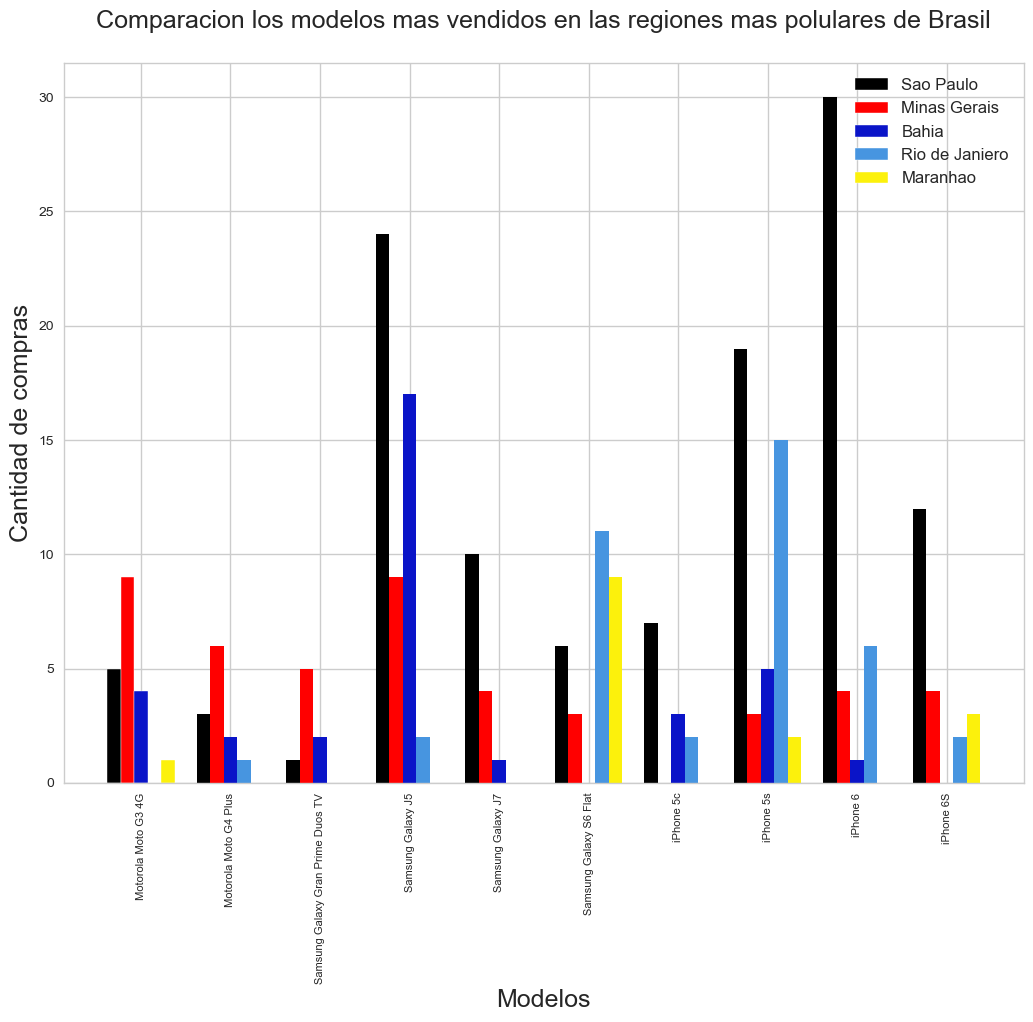

In [79]:


X = np.arange (len(top_10))
Y1 = sao_pablo.values
Y2 = minas_gerais.values
Y3 = bahia.values
Y4 = rio.values
Y5 = maranhao.values



plt.axes([0.025,0.025,1.5,1.5])
plt.bar(X-0.3 ,Y1,facecolor = "#000000",label = "Sao Paulo", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X-0.15,Y2,facecolor = "#ff0000",label = "Minas Gerais", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X ,Y3,facecolor = "#0a14c8",label = "Bahia", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.15,Y4,facecolor = "#4795e0",label = "Rio de Janiero", width = 0.15, align = "center",edgecolor = "white")
plt.bar(X+0.3 ,Y5,facecolor = "#fcf10c",label = "Maranhao", width = 0.15, align = "center",edgecolor = "white")


plt.xticks(X,top_10,fontsize = 8,rotation = "vertical")
plt.xlabel("Modelos",fontsize = 18)
plt.ylabel('Cantidad de compras', fontsize = 18)

plt.title('Comparacion los modelos mas vendidos en las regiones mas polulares de Brasil\n', fontsize = 18)

plt.legend(loc="upper right",fontsize = 12)
plt.show()